A Survey on Technology Choice
======


### Hypothesis: I think the Backlog / # of Unresolved Issues will be highly correlated with the variable "Resolve Reported Problems Quickly" since these generally go hand in hand. I believe this will be the biggest contributor to a linear fit on the Backlog / # of Unresolved Issues.

In [2]:
# For nicer printing
options(digits=2);

In [5]:
# Read in the data
data <- read.csv("TechSurvey - Survey.csv",header=T);


#convert date to unix second
for (i in c("Start", "End")) 
    data[,i] = as.numeric(as.POSIXct(strptime(data[,i], "%Y-%m-%d %H:%M:%S")))
for (i in 0:12){
    vnam = paste(c("PG",i,"Submit"), collapse="")
    data[,vnam] = as.numeric(as.POSIXct(strptime(data[,vnam], "%Y-%m-%d %H:%M:%S")))
}
#calculate differences in time    
for (i in 12:0){
    pv = paste(c("PG",i-1,"Submit"), collapse="");
    if (i==0) 
        pv="Start";
    vnam = paste(c("PG",i,"Submit"), collapse="");
    data[,vnam] = data[,vnam] -data[,pv];
}



v0 <- data[,"PG0Submit"]
v1 <- data[,"PG1Submit"]
v2 <- data[,"PG2Submit"]
v3 <- data[,"PG3Submit"]
v4 <- data[,"PG4Submit"]
v5 <- data[,"PG5Submit"]
v6 <- data[,"PG6Submit"]
v7 <- data[,"PG7Submit"]
v8 <- data[,"PG8Submit"]
v9 <- data[,"PG9Submit"]
v10 <- data[,"PG10Submit"]
v11 <- data[,"PG11Submit"]
v12 <- data[,"PG12Submit"]

means <- c()
means <- c(means, mean(v0, na.rm = TRUE))
means <- c(means, mean(v1, na.rm = TRUE))
means <- c(means, mean(v2, na.rm = TRUE))
means <- c(means, mean(v3, na.rm = TRUE))
means <- c(means, mean(v4, na.rm = TRUE))
means <- c(means, mean(v5, na.rm = TRUE))
means <- c(means, mean(v6, na.rm = TRUE))
means <- c(means, mean(v7, na.rm = TRUE))
means <- c(means, mean(v8, na.rm = TRUE))
means <- c(means, mean(v9, na.rm = TRUE))
means <- c(means, mean(v10, na.rm = TRUE))
means <- c(means, mean(v11, na.rm = TRUE))
means <- c(means, mean(v12, na.rm = TRUE))

print("Average time to complete survey in seconds")
print(sum(means))

print("Question that took the least time on average was v11")
print(min(means))

print("Question that took the most time on average was v0")
print(max(means))


[1] "Average time to complete survey in seconds"
[1] 625.6417
[1] "Question that took the least time on average was v11"
[1] 6.368944
[1] "Question that took the most time on average was v0"
[1] 299.3466


#### The average time to complete the survey, the average fastest question and the average slowest question is reported above

### Interpret  basic summaries

In [15]:
#get numeric fields only for correlation

sel = c()
for (i in 1:dim(data)[2]) if (is.numeric(data[,i])) sel = c(sel, i);


cor(data[,sel],method="spearman",use="pairwise.complete.obs"); #OK for any: uses ranks
print(data[,15])

,Device,Completed,Start,End,PG0Dis,PG0Shown,PG0Submit,PG1PsnUse,PG1WdAuth,PG1Trn,...,PG8Resp,PG8Submit,PG9Resp,PG9Submit,PG10Resp,PG10Submit,PG11Resp,PG11Submit,PG12Resp,PG12Submit
Device,1.000000000,-0.103925481,-0.0738955675,-0.12261141,0.025253355,0.018797225,-0.01961054,-0.03957742,-0.058614558,0.016895628,...,-0.116236982,-0.11136839,-0.088697987,-0.047379201,-0.077041453,-0.050355293,-0.105877905,-0.107366225,-0.114770560,-0.0636608318
Completed,-0.103925481,1.000000000,-0.0275709542,0.87955515,-0.009570578,0.013107312,0.35391034,0.39614949,0.139782065,0.166485982,...,0.860105712,0.87583777,0.860054999,0.872955625,0.878320304,0.874402744,0.908059670,0.886976961,0.851796979,0.8845768482
Start,-0.073895567,-0.027570954,1.0000000000,0.33463337,0.077334538,0.012656937,0.02073564,-0.05799525,-0.092195979,0.039534788,...,-0.012794231,-0.01048460,-0.010641362,-0.011915121,-0.027717865,-0.007138544,-0.034934589,0.001369309,-0.005958920,0.0002972667
End,-0.122611412,0.879555148,0.3346333668,1.00000000,0.015149542,0.014450520,0.34638688,0.34840152,0.080882991,0.180873672,...,0.765038478,0.77936729,0.767168132,0.776737727,0.772722920,0.781454207,0.792340383,0.798258048,0.762440087,0.7958918973
PG0Dis,0.025253355,-0.009570578,0.0773345379,0.01514954,1.000000000,0.890921829,0.03836216,0.03674080,-0.013342977,-0.022039412,...,-0.013890966,0.01389412,-0.002246263,0.003833887,-0.002328043,-0.015941056,-0.015150724,-0.014211375,-0.018275642,0.0164418487
PG0Shown,0.018797225,0.013107312,0.0126569374,0.01445052,0.890921829,1.000000000,0.06282951,0.05729272,0.007489552,-0.030470792,...,0.003570048,0.03194705,0.020699148,0.021543710,0.007823376,-0.001411053,0.008177116,-0.002651478,-0.005093303,0.0327854084
PG0Submit,-0.019610539,0.353910337,0.0207356439,0.34638688,0.038362155,0.062829515,1.00000000,0.26407753,0.109354387,0.151569452,...,0.329983022,0.35412360,0.281288173,0.367263463,0.364724563,0.382606118,0.312248039,0.346706990,0.283543402,0.3462344830
PG1PsnUse,-0.039577418,0.396149491,-0.0579952475,0.34840152,0.036740798,0.057292721,0.26407753,1.00000000,-0.049627294,-0.174984854,...,0.319828319,0.34018819,0.335597820,0.339826084,0.355445207,0.371673518,0.382537709,0.331637234,0.314066059,0.3325269013
PG1WdAuth,-0.058614558,0.139782065,-0.0921959790,0.08088299,-0.013342977,0.007489552,0.10935439,-0.04962729,1.000000000,-0.092181979,...,0.116759564,0.10637021,0.142953970,0.095295586,0.113724793,0.117606053,0.155189014,0.122756429,0.153975579,0.1483854990
PG1Trn,0.016895628,0.166485982,0.0395347876,0.18087367,-0.022039412,-0.030470792,0.15156945,-0.17498485,-0.092181979,1.000000000,...,0.206966337,0.18608355,0.144416328,0.177344686,0.181278913,0.184364670,0.135249763,0.197176873,0.155512759,0.1819666518


   [1]   1   1 111   1 111   1 111   1 111   1   1   1   6  54  43   1   1 111
  [19]   1   1 111 111   1   1  79 111 177 162 111  43   6 111 111   1   1   6
  [37]  15 111 111  65   1  43  92 111   6 136   1   1  55 110  26 111 111  49
  [55] 111 111 111 183 111   1  43 111   1   1  26 111 111   1   1 111 111 127
  [73]   1   6 111   1   1   1  43  43 111   1   1   1 111  43 111  43 111   1
  [91]  82 111   6 111  13   1   1 131   6   1 111 111 111   1   6   1 111 175
 [109]   1  43  43   1 111  26  43 111   6 120   1  43   6   1  26 111  43  43
 [127]   6 111   1   6 111   1  19   1 111  43   1   6 113   1  84  43   6  91
 [145] 111   1   1 111   6  82 108   1  43 111   1  43   6 126   1   1  43 111
 [163] 111   1   6   1 181   6   6  43   6  43   1   1   1   1  43 111  28 111
 [181] 111   6   1  16   1 111   1   1 111   6 111 111  43   6  43 111   1 111
 [199]   1  66   6   6   6 111  97 111   1  43  43   1   1   1  43 111   1   1
 [217]   1 170   1   1 111   6 111 111  26 111   6 1

In [7]:
# Define a function
for(i in colnames(data))
{
    data[,i] <- as.numeric (data[,i]);
    #print(i)
    #print(unique(data[,i]))
}
data <- replace(data, is.na(data), 0)

hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max) > level;
  res[sel,sel];
}
hiCor(data,.7)

,Completed,End,PG0Dis,PG0Shown,PG2Resp.1,PG3Submit,PG4Prm9_10,PG4AllResp,PG4Submit,PG5_1RRPQ,...,PG8Resp,PG8Submit,PG9Resp,PG9Submit,PG10Resp,PG10Submit,PG11Resp,PG11Submit,PG12Resp,PG12Submit
Completed,1.000000000,0.87955515,-0.0095705776,0.0131073119,0.73589472,0.74307007,0.531153972,0.765225832,0.746604219,0.570304429,...,0.860105712,0.87583777,0.860054999,0.872955625,0.878320304,0.874402744,0.908059670,0.886976961,0.851796979,0.88457685
End,0.879555148,1.00000000,0.0151495425,0.0144505195,0.65581186,0.66484078,0.458140220,0.664254494,0.658888126,0.468086937,...,0.765038478,0.77936729,0.767168132,0.776737727,0.772722920,0.781454207,0.792340383,0.798258048,0.762440087,0.79589190
PG0Dis,-0.009570578,0.01514954,1.0000000000,0.8909218287,0.00778265,0.02375629,-0.009299274,-0.001318751,-0.026976287,-0.005790669,...,-0.013890966,0.01389412,-0.002246263,0.003833887,-0.002328043,-0.015941056,-0.015150724,-0.014211375,-0.018275642,0.01644185
PG0Shown,0.013107312,0.01445052,0.8909218287,1.0000000000,0.02585261,0.04597090,-0.003333058,0.010786165,-0.005427086,0.007297840,...,0.003570048,0.03194705,0.020699148,0.021543710,0.007823376,-0.001411053,0.008177116,-0.002651478,-0.005093303,0.03278541
PG2Resp.1,0.735894721,0.65581186,0.0077826504,0.0258526121,1.00000000,0.72933308,0.442142992,0.667372316,0.676064132,0.428077130,...,0.643681553,0.64587350,0.659988320,0.660464031,0.657082655,0.650105585,0.691465627,0.667913741,0.647910426,0.66757837
PG3Submit,0.743070074,0.66484078,0.0237562927,0.0459709026,0.72933308,1.00000000,0.438347807,0.670390218,0.751538962,0.441207514,...,0.647927206,0.69694606,0.638369364,0.716969344,0.676305691,0.692267192,0.688219655,0.690972420,0.636103711,0.69595173
PG4Prm9_10,0.531153972,0.45814022,-0.0092992739,-0.0033330583,0.44214299,0.43834781,1.000000000,0.880539010,0.375857036,0.320187864,...,0.415482511,0.41362859,0.480226821,0.452070307,0.427478287,0.418092067,0.478543336,0.433159528,0.448828607,0.44379047
PG4AllResp,0.765225832,0.66425449,-0.0013187513,0.0107861650,0.66737232,0.67039022,0.880539010,1.000000000,0.666713609,0.452741796,...,0.635413126,0.64477323,0.680067808,0.672228257,0.663043167,0.654933143,0.694249772,0.654542713,0.646535202,0.65942382
PG4Submit,0.746604219,0.65888813,-0.0269762868,-0.0054270861,0.67606413,0.75153896,0.375857036,0.666713609,1.000000000,0.449116200,...,0.674242881,0.70531140,0.633786048,0.739853011,0.732371220,0.751572501,0.693436895,0.724832522,0.639538313,0.71475653
PG5_1RRPQ,0.570304429,0.46808694,-0.0057906695,0.0072978396,0.42807713,0.44120751,0.320187864,0.452741796,0.449116200,1.000000000,...,0.487359100,0.49818037,0.490988605,0.507188886,0.485701944,0.486918459,0.514788281,0.496441098,0.468289795,0.50494049


### Top Ranked Criteria 
There are a lot of "perfect fits" of variables so a dimensionality reduction is suggested.

In [8]:
res <- c();
vnam <- names(data);
for (i in 2:dim(data)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data))$r.squared,2)));
}
row.names(res) <- vnam[res[,1]];
res[order(-res[,2]),];

Warning message in summary.lm(lm(fmla, data = data)):
"essentially perfect fit: summary may be unreliable"Warning message in summary.lm(lm(fmla, data = data)):
"essentially perfect fit: summary may be unreliable"Warning message in summary.lm(lm(fmla, data = data)):
"essentially perfect fit: summary may be unreliable"

Completed,2,1.00
Start,3,1.00
End,4,1.00
PG4Dtr0_6,17,1.00
PG4Psv7_8,18,1.00
PG4Prm9_10,19,1.00
PG4AllResp,20,1.00
PG5_12Time,57,0.96
PG5_13Time,60,0.96
PG5_2Time,27,0.95
PG5_11Time,54,0.94


# Model fit on PG5_2BNUI

In [9]:
sel = c() 
for (i in 1:dim(data)[2]) if (is.numeric(data[,i])) sel = c(sel, i);
cor(data[,sel], data[,'PG5_2BNUI'], method="spearman",use="pairwise.complete.obs");
model <- lm(PG5_2BNUI ~ ., data = data)
summary(model)


Device,-0.079002647
Completed,0.531932848
Start,-0.055164357
End,0.443670408
PG0Dis,-0.009744208
PG0Shown,-0.003365558
PG0Submit,0.187456346
PG1PsnUse,0.198259559
PG1WdAuth,0.111774187
PG1Trn,0.071307287
PG1Other,0.058182294



Call:
lm(formula = PG5_2BNUI ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5002 -0.1136  0.0092  0.1231  3.3651 

Coefficients: (1 not defined because of singularities)
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.856e+02  7.169e+01   2.588 0.009750 ** 
Device        -1.674e-02  3.303e-02  -0.507 0.612469    
Completed     -1.845e+02  7.170e+01  -2.574 0.010172 *  
Start          1.199e-07  4.657e-08   2.575 0.010151 *  
End            1.199e-07  4.658e-08   2.573 0.010182 *  
PG0Dis        -6.946e-04  3.269e-04  -2.125 0.033775 *  
PG0Shown       1.559e-04  7.354e-05   2.120 0.034227 *  
PG0Submit      9.328e-06  4.750e-06   1.964 0.049764 *  
PG1PsnUse     -1.172e-02  1.478e-02  -0.793 0.428132    
PG1WdAuth     -1.541e-02  2.351e-02  -0.655 0.512420    
PG1Trn         8.749e-02  5.292e-02   1.653 0.098485 .  
PG1Other       4.465e-03  2.250e-03   1.985 0.047386 *  
PG1Submit     -6.523e-05  7.091e-05  -0.920 0.357782    
PG2R

#### The highest correlations are PG5_1RRPQ, PG5_7NDYP, PG5_13NFG, and PG7C.C.  The model's p-value is significant and along with the high R-squared value, this suggests the model is a good fit for the PG5_2BNUI.

My hypothesis was correct because one of the highest correlated variables with PG5_2BNUI is PG5_1RRPQ (Resolve Reported Problems Quickly). Th other highly correlated variables PG5_7NDYP (# Developers of Your Project) and PG5_13NFG (# of Forks on GitHub) make logical sense. More developers on a project mean a problem is likely to be resolved faster and a higher number of forks indicate a user heavy project, which will require a higher rate of resolved issues.

# Dimensionality Reduction
PCA

   
PC1
   
PC2
   
PC3
       PG1Trn PG4Psv7_8 PG4Prm9_10
PC4 0.3762107  0.332281 -0.4481027
        PG0Dis   PG0Shown
PC5 -0.6271418 -0.6219762


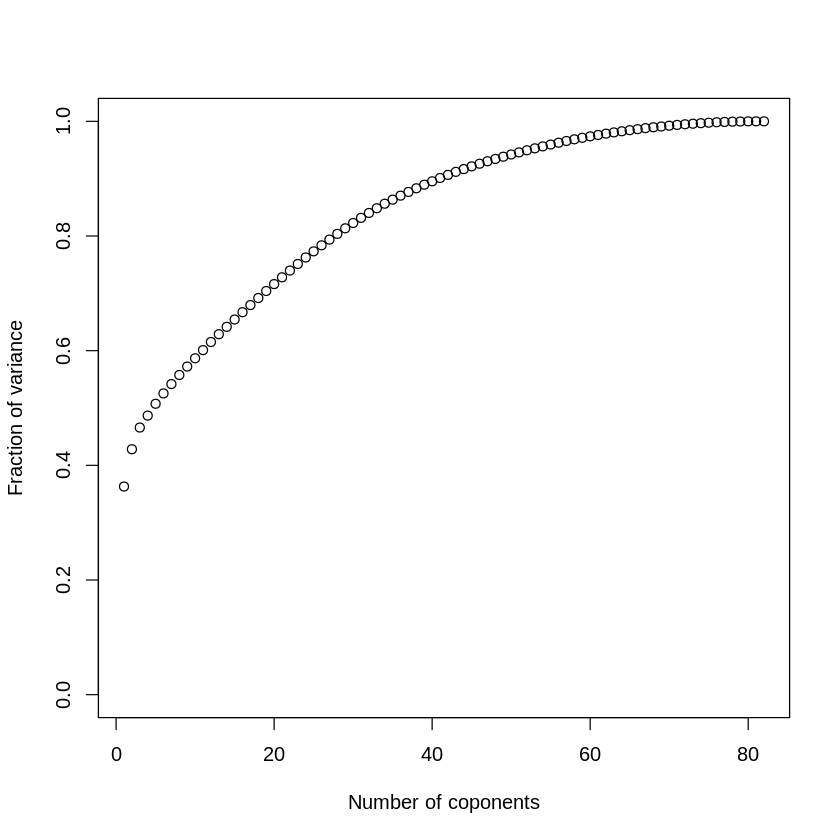

In [20]:
plot(1:82,cumsum(prcomp(data, retx=F,scale=T)$sdev^2)/sum(prcomp(data, retx=F,scale=T)$sdev^2),ylim=c(0,1),xlab="Number of coponents",ylab="Fraction of variance");
res<-prcomp(data, retx=F,scale=T)$rotation[,1:5];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
for (i in 1:5)
  print(t(res[resAbs[,i]>.3,i,drop=FALSE]));

### Reduce the linear model to just the first 3 PCs

In [21]:
fmla ~ PG5_2BNUI ~ PG1Trn+PG4Psv7_8+PG4Prm9_10 

fmla ~ PG5_2BNUI ~ PG1Trn + PG4Psv7_8 + FIX + PG4Prm9_10

In [26]:

mod <- glm(PG5_2BNUI ~ PG1Trn+PG4Psv7_8+PG4Prm9_10,data=data);
summary(mod);


Call:
glm(formula = PG5_2BNUI ~ PG1Trn + PG4Psv7_8 + PG4Prm9_10, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2368  -1.7330  -0.3959   1.0386   4.6041  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.29445    0.16976   7.625 4.57e-14 ***
PG1Trn       0.10149    0.14180   0.716    0.474    
PG4Psv7_8    0.19101    0.01793  10.656  < 2e-16 ***
PG4Prm9_10   0.17394    0.01097  15.857  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 3.154341)

    Null deviance: 5166.2  on 1352  degrees of freedom
Residual deviance: 4255.2  on 1349  degrees of freedom
AIC: 5399.9

Number of Fisher Scoring iterations: 2


In [27]:
anova(mod, test="Chi");

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,1352,5166.170,NA
PG1Trn,1,23.45444,1351,5142.716,6.394574e-03
PG4Psv7_8,1,94.35751,1350,5048.358,4.517460e-08
PG4Prm9_10,1,793.15241,1349,4255.206,1.255404e-56


### Results
The dimensionality reduction gives new insight to the model. Now, PG1Trn, PG4Psv7_8, and PG4Prm9_10 are very influencial to PG5_2BNUI.